# Nepremičnine v Ljubljani

Pri projektni nalogi bom analiziral trg Ljubljanskih nepremičnin na podlagi podatkov zbranih s strani Nepremicnine.net. Iz nabora podatkov bom skušal izluščiti čim več uporabnih informacij in zanimivosti o nepremičninah in poskušal narediti kakšne sklepe.

In [127]:
# Naložimo pandas
import pandas as pd
import numpy as np

# Naložimo razpredelnico
nepremicnine = pd.read_csv('obdelani-podatki/stanovanjaLJ.csv', index_col="Id")

pd.options.display.max_rows = 20

# Uvozimo knjižnico za risanje grafov
%matplotlib inline

In [128]:
nepremicnine

,Lokacija,Leto,Sobe,Kvadratura,Agencija,Cena
Id,,,,,,
5610162,"LJ. CENTER, MESTNI TRG",1459,2.5,86.00,"Komfort skupina d.o.o., nepremičnine",288000.00
5867227,"LJ. VIČ, CESTA NA BRDO",2011,3.0,197.39,Zasebna ponudba,349900.00
5893832,LJ. BEŽIGRAD,2014,4.0,105.18,Eko srebrna hiša d.o.o.,466688.74
5893834,LJ. BEŽIGRAD,2014,4.0,150.91,Eko srebrna hiša d.o.o.,638726.62
5896102,LJ. BEŽIGRAD,2014,3.0,90.43,Eko srebrna hiša d.o.o.,390647.08
...,...,...,...,...,...,...
6303210,LJ. ŠIŠKA,1964,3.0,69.40,MESTO NEPREMIČNIN d.o.o.,174000.00
6303211,"LJ. CENTER, BETETHOVNOVA ULICA",1924,4.0,142.50,Nepremičnine Plus d.o.o.,535000.00
6303228,FUŽINE,1985,4.0,99.00,"STAN nepremičnine d.o.o., Ljubljana",250000.00


# Katere lokacije imajo najvišje cene v Ljubljani?

Moja hipoteza je da bo to center ljubljane, zaradi očitnih razlogov. Vendar bi se kasneje rad prepričal, če se statistika spremeni pod pogojem da se omejim na krajše časovno obdobje gradnje. Pričakujem da bo število dražjih nepremičnin, ki so zgrajene šele po letu 2000 bolj enakomerno porazdeljeno kot če upoštevam vsa leta. Pri vsem tem bom za "drage" nepremičnine upošteval tista, ki stanejo nad 500000 €.

In [21]:
visoke_cene = nepremicnine[nepremicnine.Cena >= 500000.00]
visoke_cene.sort_values(['Cena'], ascending=False)

,Lokacija,Leto,Sobe,Kvadratura,Agencija,Cena,Cenovni_razred
Id,,,,,,,
6300324,SP. ŠIŠKA,2018,5.0,217.14,"Stoja trade, d.o.o., Ljubljana",1790000.00,17
6261507,SP. ŠIŠKA,2018,5.0,217.14,"Stoja trade, d.o.o., Ljubljana",1790000.00,17
6209551,"STARA LJ., NOVO ŠTIRISOBNO STANOVANJE V CENTRU",2012,4.0,206.50,Mreža nepremičnin d.o.o.,1250000.00,12
6284304,LJ. CENTER,1896,5.0,330.70,Rocco nepremičnine d.o.o.,1200000.00,12
6227753,LJ. CENTER,1896,5.0,330.00,Vila Portorož d.o.o.,1200000.00,12
...,...,...,...,...,...,...,...
6291052,MURGLE,2020,4.0,109.55,"Stoja trade, d.o.o., Ljubljana",504206.00,5
6281852,"MURGLE, LJ.",2020,4.0,97.98,IMI Stil d.o.o.,504206.00,5
6264553,LJ. BEŽIGRAD,2014,4.0,105.35,Agencija Katja d.o.o.,500457.09,5


In [22]:
visoke_cene.groupby('Lokacija').size().nlargest(5)

Lokacija
LJ. CENTER      36
LJ. BEŽIGRAD    14
TRNOVO           9
MURGLE           6
MURGLE, LJ.      6
dtype: int64

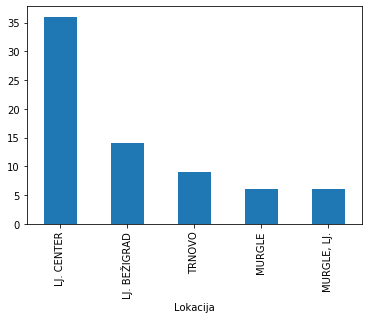

In [23]:
visoke_cene.groupby('Lokacija').size().nlargest(5).plot.bar()

Moja hipoteza je potrjena. Center Ljubljane ima daleč največ dragih stanovanj, sedaj se bom omejil na nepremičnine zgrajene po letu 2000 in ponovno pogledal kakšna je statistika.

In [24]:
visoke_cene = nepremicnine[(nepremicnine.Leto >= 2000) & (nepremicnine.Cena >= 500000.00)]
visoke_cene.sort_values(['Cena'], ascending=False).groupby('Lokacija').size().nlargest(5)

Lokacija
LJ. BEŽIGRAD    13
LJ. CENTER      13
TRNOVO           9
MURGLE           6
MURGLE, LJ.      6
dtype: int64

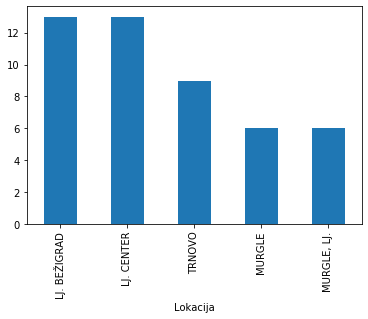

In [25]:
visoke_cene.sort_values(['Cena'], ascending=False).groupby('Lokacija').size().nlargest(5).plot.bar()

Tudi to je moja hipoteza potrjena. Menim, da je hipoteza bila smiselna, saj v centru ni več prostora za nova stanovanja. Zato so novogradnje nasploh bolj porazdeljene izven centrov mest. Poleg tega ima center kulturno in zgodovinsko pomembnost in je to še en dejavnik, ki mi da misliti, da bodo novejše gradnje v predelih mesta blizu centra.

# Cenovni razredi nepremičnin

Preveriti želim koliko nepremicnin pade v določen cenovni razred.
Cenovne razrede si bom razdelil po inkrementih 100000 €, tiste ki stanejo manj pa bom razdelil še na razrede po 10000€. To mi tudi nudi podatke za ustrezen prikaz porazadelitve cen, saj bi bilo, z do sedaj neobdelanimi podatki, veliko težje delati. Namreč ne morem dosežti nekega prikaza s konkretnimi cenami, ker je podatek koliko je stanovanj točno določene cene praktično neuporaben.

Predvidevam, da bo večino nepremičnin cenovno padlo pod nekje pod 400000€.

In [160]:
nepremicnine['Cenovni_razred'] = (nepremicnine.Cena // 100000 + 1).apply(int)
nepremicnine_po_ceni = nepremicnine[nepremicnine.Cenovni_razred != 0]
nepremicnine_po_ceni.groupby('Cenovni_razred').size()

Cenovni_razred
1      27
2     643
3     437
4     191
5     115
6      40
7      40
8      27
9      17
10      4
11      2
13      3
18      2
dtype: int64

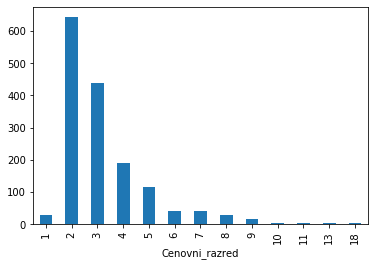

In [161]:
nepremicnine_po_ceni.groupby('Cenovni_razred').size().plot.bar()

Vidimo, da so cene zelo neenakomerno porazdeljene, kar je bilo pričakovano. Moja hipoteza pa je tudi skladna z ugotovitvijo.
Zavedam se, da je v Ljubljani veliko stanovanj in študentskih domov, ki se oddajajo konstantno. Zaradi tega sem, kljub vsemu
pričakoval veliko večje število nepremičnin, ki bi padle v prvi razred.

Nepremičnine, ki stanejo pod 100000€ bi sedaj rad razdelil še na cenovne razrede po 10000€ in pogledal koliko je takih,
tu se bo morda na podlagi mojega prejšnjega sklepa pokazalo rahlo večje število nizkocenovnih nepremičnin (pod 10000€).

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


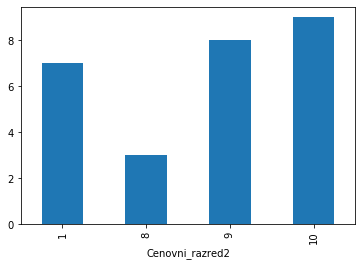

In [162]:
cenejse_nepremicnine = nepremicnine[nepremicnine.Cenovni_razred == 1]
cenejse_nepremicnine['Cenovni_razred2'] = (nepremicnine.Cena // 10000 + 1).apply(int)
cenejse_nepremicnine.groupby('Cenovni_razred2').size().plot.bar()

# Porazdelitev cen po regijah

Sedaj bi ta podatek rad uporabil, da vidim kakšna je porazdelitev cen glede na lokacijo. Vendar problem se pojavi ker je
število lokacij izredno veliko, zato se bom omejil le na vnose, ki imajo v imenu kraja neko večje Ljubljansko območje in
na podlagi cenovnih razredov ter cene ocenil, koliko vredne nepremičnine so na voljo v določeni regiji.

Območja, ki jih bom obravnaval so: Center, Bežigrad, Trnovo, Vič, Šiška, Črnuče, Rudnik, Moste, Vižmarje, Rožna dolina, 

In [113]:
nepremicnine

,Lokacija,Leto,Sobe,Kvadratura,Agencija,Cena,Cenovni_razred,Povprecen_kvadraten_meter
Id,,,,,,,,
5610162,"LJ. CENTER, MESTNI TRG",1459,2.5,86.00,"Komfort skupina d.o.o., nepremičnine",288000.00,3,3348.84
5867227,"LJ. VIČ, CESTA NA BRDO",2011,3.0,197.39,Zasebna ponudba,349900.00,4,1772.63
5893832,LJ. BEŽIGRAD,2014,4.0,105.18,Eko srebrna hiša d.o.o.,466688.74,5,4437.05
5893834,LJ. BEŽIGRAD,2014,4.0,150.91,Eko srebrna hiša d.o.o.,638726.62,7,4232.50
5896102,LJ. BEŽIGRAD,2014,3.0,90.43,Eko srebrna hiša d.o.o.,390647.08,4,4319.88
...,...,...,...,...,...,...,...,...
6303210,LJ. ŠIŠKA,1964,3.0,69.40,MESTO NEPREMIČNIN d.o.o.,174000.00,2,2507.20
6303211,"LJ. CENTER, BETETHOVNOVA ULICA",1924,4.0,142.50,Nepremičnine Plus d.o.o.,535000.00,6,3754.39
6303228,FUŽINE,1985,4.0,99.00,"STAN nepremičnine d.o.o., Ljubljana",250000.00,3,2525.25


In [148]:
nepremicnine['Regija'] = 'Ostalo'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*CENTER.*')] = 'Center'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*BEŽIGRAD.*')] = 'Bežigrad'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*TRNOVO.*')] = 'Trnovo'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*VIČ.*')] = 'Vič'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*ŠIŠKA.*')] = 'Šiška'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*ČRNUČE.*')] = 'Črnuče'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*RUDNIK.*')] = 'Rudnik'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*VIŽMARJE.*')] = 'Vižmarje'
nepremicnine['Regija'].loc[nepremicnine['Lokacija'].str.match('.*ROŽNA DOLINA.*')] = 'Rožna'

nepremicnine
regije = nepremicnine.groupby('Regija')

In [146]:
regije.Lokacija.count()

Regija
Bežigrad    238
Center      361
Ostalo      451
Rožna        24
Rudnik       35
Trnovo       35
Vič         111
Vižmarje     11
Črnuče       30
Šiška       252
Name: Lokacija, dtype: int64

Če ignoriram regije, ki jih nisem obravnaval se vidi da je v centru tudi nakopičeno največ nepremičnin, ki so naprodaj.
Poglejmo še skupne cene nepremičnin po regijah, nato pa bom naredil oceno, kje je nekako najbolj drago povprečno stanovanje.

In [147]:
regije.Cena.sum()

Regija
Bežigrad    6.188715e+07
Center      1.324923e+08
Ostalo      1.088218e+08
Rožna       1.086118e+07
Rudnik      7.046890e+06
Trnovo      1.554500e+07
Vič         2.752751e+07
Vižmarje    1.729746e+06
Črnuče      6.238164e+06
Šiška       5.420039e+07
Name: Cena, dtype: float64

Ponovno vidimo, da je center najbolj draga regija glede skupne vrednosti nepremičnin. Vendar pa je ta podatek še nekoliko bolj
natančen, saj pri prvi oceni nisem upošteval morebitne drugačne naslove lokacij, ki bi se še vedno nahajale v centru pod 
rahlo drugačnim imenom.

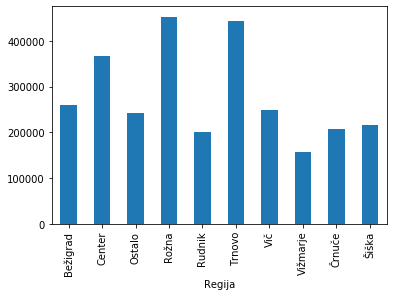

In [144]:
(regije.Cena.sum() // regije.Lokacija.count()).plot.bar()

Graf nam pove, da je rožna dolina nekako najbolj gosta glede cene na napremičnino.

# Procenti premoženja skozi vse večje regije

Izrisal bom graf, ki prikazuje kakšen procent skupne cene vseh nepremičnin po vseh večjih regijah ima posamezna regija

In [169]:
skupna_cena = regije.Cena.sum().sum().round(2)

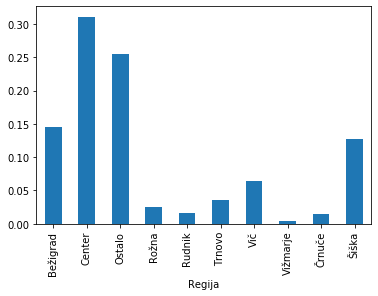

In [170]:
(regije.Cena.sum() / skupna_cena).plot.bar()

# Povprečna cena vseh stanovanj

In [11]:
round(nepremicnine.Cena.mean(), 2)

275419.99

# Kako parametri vplivajo na ceno?

Sedaj bi rad imel nek kvantitativen opis tega kaj je tisto kar zares vpliva na ceno stanovanja. Moja hipoteza je, da je to lokacija ter takoj za tem število sob oz. kvadratura. Tu bom seveda obravnaval vse podatke in ne le tiste, zgrajene po letu 2000.

In [77]:
nepremicnine

,Lokacija,Leto,Sobe,Kvadratura,Agencija,Cena,Cenovni_razred
Id,,,,,,,
5610162,"LJ. CENTER, MESTNI TRG",1459,2.5,86.00,"Komfort skupina d.o.o., nepremičnine",288000.00,200000
5867227,"LJ. VIČ, CESTA NA BRDO",2011,3.0,197.39,Zasebna ponudba,349900.00,300000
5893832,LJ. BEŽIGRAD,2014,4.0,105.18,Eko srebrna hiša d.o.o.,466688.74,400000
5893834,LJ. BEŽIGRAD,2014,4.0,150.91,Eko srebrna hiša d.o.o.,638726.62,600000
5896102,LJ. BEŽIGRAD,2014,3.0,90.43,Eko srebrna hiša d.o.o.,390647.08,300000
...,...,...,...,...,...,...,...
6303210,LJ. ŠIŠKA,1964,3.0,69.40,MESTO NEPREMIČNIN d.o.o.,174000.00,100000
6303211,"LJ. CENTER, BETETHOVNOVA ULICA",1924,4.0,142.50,Nepremičnine Plus d.o.o.,535000.00,500000
6303228,FUŽINE,1985,4.0,99.00,"STAN nepremičnine d.o.o., Ljubljana",250000.00,200000


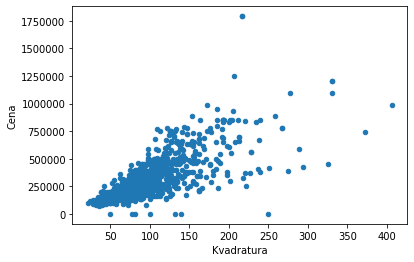

In [78]:
nepremicnine.plot.scatter('Kvadratura', 'Cena')

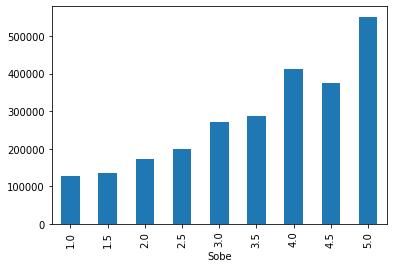

In [85]:
nepremicnine.groupby('Sobe').Cena.mean().plot.bar('Sobe', 'Cena')

# Katera agencija bi zaslužila največ, če bi prodala vsa svoja stanovanja?

In [18]:
nepremicnine_od_agencij = nepremicnine[nepremicnine.Agencija != "Zasebna ponudba"]
nepremicnine_od_agencij.groupby("Agencija").Cena.sum().nlargest(10)

Agencija
Stoja trade, d.o.o., Ljubljana                 43017217.16
MESTO NEPREMIČNIN d.o.o.                       28393021.00
LJUBLJANA NEPREMIČNINE d.o.o.                  25712021.00
Rocco nepremičnine d.o.o.                      20333636.24
RCN d.o.o.                                     19188862.35
Mreža nepremičnin d.o.o.                       15200006.00
ZWELO online nepremičninske storitve d.o.o.    13466900.00
GB nepremičnine, Goran Barišić s.p.            11023273.77
STAN nepremičnine d.o.o., Ljubljana            10605900.00
KREATIVDOM d.o.o.                               9064900.00
Name: Cena, dtype: float64

# Povprečna cena kvadratnega metra v Ljubljani

In [19]:
nepremicnine

,Lokacija,Leto,Sobe,Kvadratura,Agencija,Cena,Cenovni_razred
Id,,,,,,,
5610162,"LJ. CENTER, MESTNI TRG",1459,2.5,86.00,"Komfort skupina d.o.o., nepremičnine",288000.00,2
5867227,"LJ. VIČ, CESTA NA BRDO",2011,3.0,197.39,Zasebna ponudba,349900.00,3
5893832,LJ. BEŽIGRAD,2014,4.0,105.18,Eko srebrna hiša d.o.o.,466688.74,4
5893834,LJ. BEŽIGRAD,2014,4.0,150.91,Eko srebrna hiša d.o.o.,638726.62,6
5896102,LJ. BEŽIGRAD,2014,3.0,90.43,Eko srebrna hiša d.o.o.,390647.08,3
...,...,...,...,...,...,...,...
6303210,LJ. ŠIŠKA,1964,3.0,69.40,MESTO NEPREMIČNIN d.o.o.,174000.00,1
6303211,"LJ. CENTER, BETETHOVNOVA ULICA",1924,4.0,142.50,Nepremičnine Plus d.o.o.,535000.00,5
6303228,FUŽINE,1985,4.0,99.00,"STAN nepremičnine d.o.o., Ljubljana",250000.00,2


In [30]:
povp_kvadratura = nepremicnine.Kvadratura.sum().round() // nepremicnine.Lokacija.count()
povp_cena = nepremicnine.Cena.sum().round() // nepremicnine.Lokacija.count()

In [31]:
povp_cena // povp_kvadratura

3129.0

# Najbolj ugodno stanovanje

Najbolj ugodno stanovanje bom ovrednotil le na podlagi njene kvadrature, ker se mi podatek o tem koliko je sob zdi odveč.

In [115]:
nepremicnine["Povprecen_kvadraten_meter"] = (nepremicnine.Cena / nepremicnine.Kvadratura).round(2)
nepremicnine

,Lokacija,Leto,Sobe,Kvadratura,Agencija,Cena,Cenovni_razred,Povprecen_kvadraten_meter
Id,,,,,,,,
5610162,"LJ. CENTER, MESTNI TRG",1459,2.5,86.00,"Komfort skupina d.o.o., nepremičnine",288000.00,3,3348.84
5867227,"LJ. VIČ, CESTA NA BRDO",2011,3.0,197.39,Zasebna ponudba,349900.00,4,1772.63
5893832,LJ. BEŽIGRAD,2014,4.0,105.18,Eko srebrna hiša d.o.o.,466688.74,5,4437.05
5893834,LJ. BEŽIGRAD,2014,4.0,150.91,Eko srebrna hiša d.o.o.,638726.62,7,4232.50
5896102,LJ. BEŽIGRAD,2014,3.0,90.43,Eko srebrna hiša d.o.o.,390647.08,4,4319.88
...,...,...,...,...,...,...,...,...
6303210,LJ. ŠIŠKA,1964,3.0,69.40,MESTO NEPREMIČNIN d.o.o.,174000.00,2,2507.20
6303211,"LJ. CENTER, BETETHOVNOVA ULICA",1924,4.0,142.50,Nepremičnine Plus d.o.o.,535000.00,6,3754.39
6303228,FUŽINE,1985,4.0,99.00,"STAN nepremičnine d.o.o., Ljubljana",250000.00,3,2525.25


In [83]:
najboljsi_kvadrat = nepremicnine.Povprecen_kvadraten_meter.min()
najboljsi_kvadrat

11.0

In [84]:
nepremicnine[nepremicnine.Povprecen_kvadraten_meter == 11.0]

,Lokacija,Leto,Sobe,Kvadratura,Agencija,Cena,Cenovni_razred,Povprecen_kvadraten_meter
Id,,,,,,,,
6295198,LJ. CENTER,1550,5.0,250.0,RCN d.o.o.,2750.0,1,11.0


To se kar splača kupiti, vendar je verjetno potrebna obnova.